### **RFM_Analysis (Kmeans method)**

**Overview**

This notebook performs customer segmentation based on RFM (Recency, Frequency, and Monetary) analysis using KMeans clustering. The notebook scales and transforms RFM data automatically, chooses the best transformation method based on skewness, and allows you to determine the optimal number of clusters manually. Finally, the notebook outputs a list of "at-risk" customers based on user-specified cluster labels.


**Requirements**

- **Inputs**: Manually specify the reference date, analysis start and end dates, and desired cluster label for "at-risk" customers.
- **Outputs**: Cluster analysis report and a DataFrame of at-risk customers.


In [1]:
# import 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px
import numpy as np
from rfm_analysis_manual import *
from rfm_analysis import *

In [ ]:
# set custom analysis dates
ref_date = '2021-01-01'
start_date = '2020-01-01'
end_date = '2020-12-31'

# loading
df = pd.read_csv('../../data.csv')

# cleaning 
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df_copy = df.copy()

# selecting required columns 
df = df[['customer_key', 'quantity_purchased', 'revenue', 'purchase_date', 'time_of_purchase', 'mkt_chnl_key', 'description']]

df.head(10)

C:\Users\Richelle\AppData\Local\Temp\ipykernel_23400\2238289831.py:7: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_final.csv')
C:\Users\Richelle\AppData\Local\Temp\ipykernel_23400\2238289831.py:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['purchase_date'] = pd.to_datetime(df['purchase_date'])


,customer_key,quantity_purchased,revenue,purchase_date,time_of_purchase,mkt_chnl_key,description
0,C001743,4,56,2014-05-25,16:20:00,NaN,Food - Chips
1,C008827,11,22,2018-12-31,15:03:00,NaN,a. Beverage - Soda
2,C008830,11,143,2015-12-21,12:28:00,NaN,Food - Healthy
3,C004301,5,160,2014-05-25,16:20:00,NaN,Beverage - Energy/Protein
4,C008848,10,90,2020-12-22,19:51:00,NaN,Dishware - Utensils
5,C005060,5,19,2015-02-28,18:36:00,NaN,a. Beverage - Soda
6,C008854,9,18,2020-04-16,4:56:00,NaN,Beverage - Iced Tea
7,C008874,4,136,2019-06-25,0:31:00,NaN,Beverage - Energy/Protein
8,C008876,14,70,2016-12-15,11:16:00,NaN,Gum - Mints
9,C008881,11,66,2019-06-22,23:04:00,NaN,Coffee Cream


In [3]:
rfm_df = rfm_analysis(df, ref_date, start_date, end_date)
rfm_df.head(10)

,customer_key,purchase_date,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,C000001,2020-12-30,2,5,285,5,1,1,511,7
1,C000002,2020-11-22,40,12,587,1,1,2,112,4
2,C000003,2020-11-02,60,8,303,1,1,1,111,3
3,C000004,2020-12-21,11,17,389,4,4,1,441,9
4,C000005,2020-11-23,39,12,663,1,1,2,112,4
5,C000006,2020-11-18,44,21,1189,1,5,5,155,11
6,C000007,2020-12-20,12,19,1107,3,4,4,344,11
7,C000008,2020-12-24,8,12,475,4,1,1,411,6
8,C000009,2020-11-11,51,23,1491,1,5,5,155,11
9,C000010,2020-12-03,29,15,538,2,3,1,231,6


Kmeans Clustering of RFM 

Management of Skewness and Scaling 

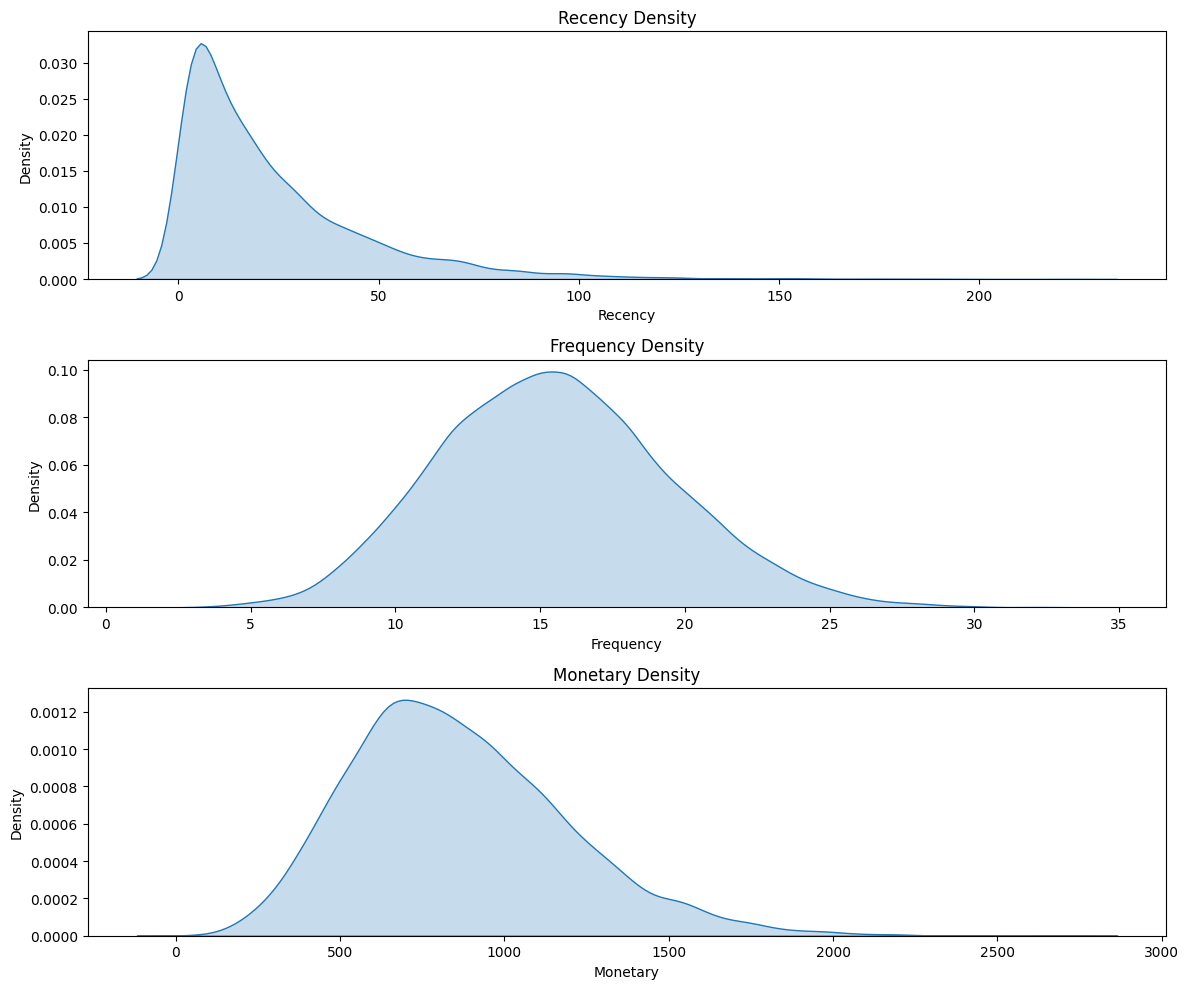

In [4]:
# plotting the distribution of RFM values
plot_rfm_distributions(rfm_df, recency_col='Recency', frequency_col='Frequency', monetary_col='Monetary')

In [5]:
skewness_results_r, best_method_r = analyze_skewness(rfm_df, 'Recency')
skewness_results_f, best_method_f = analyze_skewness(rfm_df, 'Frequency')
skewness_results_m, best_method_m = analyze_skewness(rfm_df, 'Monetary')

print(skewness_results_r)
print(skewness_results_f)
print(skewness_results_m)

Skewness analysis for "Recency":
Original Skewness: 2.03
Log Transform Skewness: -0.2
Square Root Transform Skewness: 0.73
Box-Cox Transform Skewness: -0.04

Best transformation method: Box-Cox Transform Skewness with skewness of -0.04

----------------------------------------

Skewness analysis for "Frequency":
Original Skewness: 0.26
Log Transform Skewness: -0.53
Square Root Transform Skewness: -0.14
Box-Cox Transform Skewness: 0.0

Best transformation method: Box-Cox Transform Skewness with skewness of 0.0

----------------------------------------

Skewness analysis for "Monetary":
Original Skewness: 0.66
Log Transform Skewness: -0.58
Square Root Transform Skewness: 0.09
Box-Cox Transform Skewness: 0.0

Best transformation method: Box-Cox Transform Skewness with skewness of 0.0

----------------------------------------

{'Original Skewness': np.float64(2.03), 'Log Transform Skewness': np.float64(-0.2), 'Square Root Transform Skewness': np.float64(0.73), 'Box-Cox Transform Skewness':

In [6]:
# transforming and scaling the RFM data based on best methods as analysed above
transformed_rfm_df = transform_and_scale_rfm_data(rfm_df, best_method_r, best_method_f, best_method_m, customer_key='customer_key')
transformed_rfm_df.head(10)

,customer_key,Recency,Frequency,Monetary
0,C000001,-1.555996,-3.011800,-2.177431
1,C000002,0.959012,-0.865930,-0.806914
2,C000003,1.408296,-2.016092,-2.076892
3,C000004,-0.282277,0.404538,-1.638502
4,C000005,0.931969,-0.865930,-0.531623
5,C000006,1.061866,1.332709,1.006683
6,C000007,-0.206875,0.876718,0.797344
7,C000008,-0.548958,-0.865930,-1.252952
8,C000009,1.224501,1.774536,1.713313
9,C000010,0.623978,-0.086429,-0.995434


c:\Users\Richelle\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Richelle\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Richelle\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Richelle\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, c

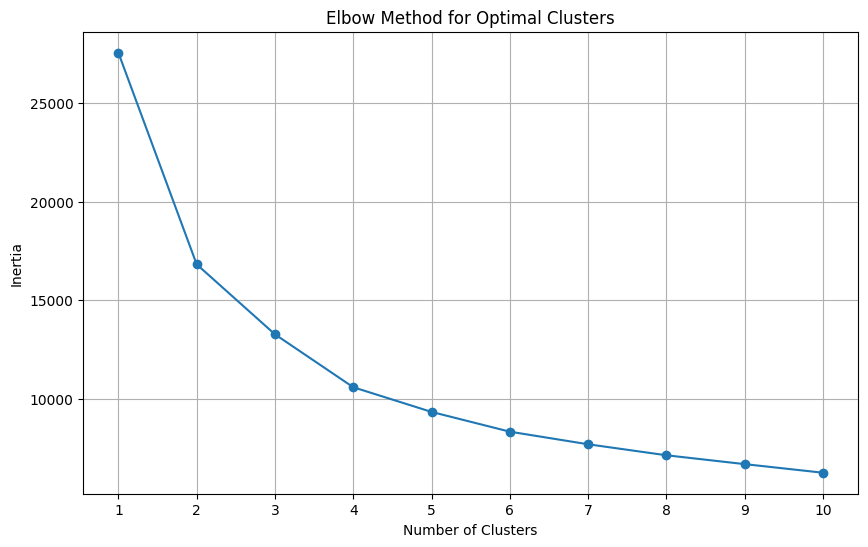

In [7]:
# finding optimal number of clusters
n_clusters = find_optimal_clusters(transformed_rfm_df[['Recency', 'Frequency', 'Monetary']])

In [8]:
n_clusters = 4  # Replace with optimal number of clusters found
labeled_rfm_df = train_and_label_clusters(rfm_df, transformed_rfm_df, customer_key='customer_key', n_clusters=n_clusters)

# labeled_rfm_df will now contain original RFM values, 'CustomerID', and the 'cluster_id' for each customer
labeled_rfm_df.head()

# analyzing the clusters
cluster_summary = analyze_clusters(labeled_rfm_df, rfm_columns=['Recency', 'Frequency', 'Monetary'])

Cluster Analysis Summary:
   cluster_id  Recency_mean  Recency_median  Recency_count  Frequency_mean  \
0           0     34.185559            29.0           2673       16.476244   
1           1     41.619738            34.0           2138       11.109448   
2           2      9.506417             7.0           2026       20.248272   
3           3      6.142311             6.0           2354       14.375106   

   Frequency_median  Frequency_count  Monetary_mean  Monetary_median  \
0              16.0             2673     923.925178            905.0   
1              11.0             2138     522.452292            525.0   
2              20.0             2026    1269.646594           1233.0   
3              14.0             2354     747.461767            739.0   

   Monetary_count  
0            2673  
1            2138  
2            2026  
3            2354  


In [9]:
# visualizing the clusters

# visualsing rfm metrics across clusters
plot_snake_plot(labeled_rfm_df, rfm_columns=['Recency', 'Frequency', 'Monetary'], cluster_col='cluster_id')

In [10]:
# distribution of clusters

plot_cluster_scatter(labeled_rfm_df, recency_col='Recency', frequency_col='Frequency', monetary_col='Monetary', cluster_col='cluster_id')

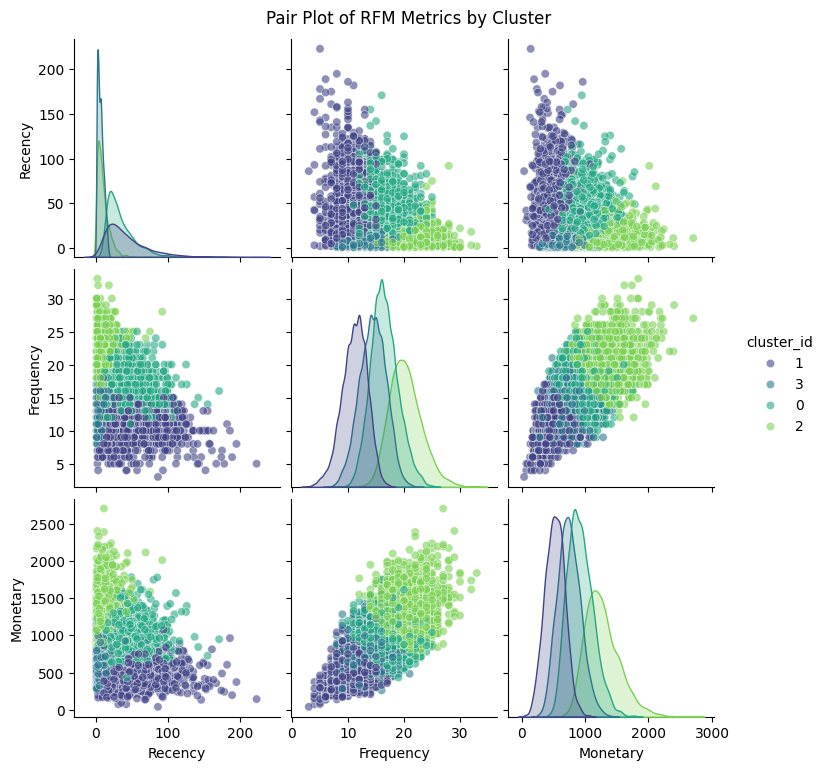

In [11]:
# pairplot 
plot_pairplot(labeled_rfm_df)

In [12]:
# define clusters based on manual analysis
cluster_mapping = {
    '2': "High-Value",
    '3': "Potential",
    '0': "Need Attention",
    '1': "Low-Value"
}

# Rename clusters
labeled_rfm_df_with_segments = rename_clusters(labeled_rfm_df, cluster_col='cluster_id', mapping=cluster_mapping, new_col='Segment')


plot_treemap(labeled_rfm_df_with_segments, segment_col='Segment')

In [13]:
labeled_rfm_df_with_segments.head(10)

,customer_key,purchase_date,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,cluster_id,Segment
0,C000001,2020-12-30,2,5,285,5,1,1,511,7,1,Low-Value
1,C000002,2020-11-22,40,12,587,1,1,2,112,4,1,Low-Value
2,C000003,2020-11-02,60,8,303,1,1,1,111,3,1,Low-Value
3,C000004,2020-12-21,11,17,389,4,4,1,441,9,3,Potential
4,C000005,2020-11-23,39,12,663,1,1,2,112,4,1,Low-Value
5,C000006,2020-11-18,44,21,1189,1,5,5,155,11,0,Need Attention
6,C000007,2020-12-20,12,19,1107,3,4,4,344,11,2,High-Value
7,C000008,2020-12-24,8,12,475,4,1,1,411,6,3,Potential
8,C000009,2020-11-11,51,23,1491,1,5,5,155,11,2,High-Value
9,C000010,2020-12-03,29,15,538,2,3,1,231,6,1,Low-Value


Outputting orginal csv with cluster labels and at risk customers

In [ ]:
# analyse clusters and decide which cluster is at risk (in this case it is cluster 1)
at_risk_customers_df = get_at_risk_customers(labeled_rfm_df, cluster_col='cluster_id', at_risk_cluster='1')

# Display or save the at-risk DataFrame as needed
at_risk_customers_df.head(10)

# Merge customer label with orginal dataframe 
labeled_rfm_segments_2020 = df_copy.merge(labeled_rfm_df_with_segments[['customer_key', "Segment"]], 
                                 on="customer_key", 
                                 how='left')
labeled_rfm_segments_2020 = labeled_rfm_segments_2020.sort_values(by='customer_key').reset_index(drop=True)
labeled_rfm_segments_2020.head() 

#uncomment to save as csv
# at_risk_customers_df.to_csv('at_risk_customers.csv', index=False)
# labeled_rfm_segments_2020.to_csv('rfm_segments_2020.csv', index=False)
